In [41]:
# load library and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm,multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import time
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [42]:
# load dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [43]:
# display the dataset
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [44]:
# got the name of dataset
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [45]:
# check whether there are empty cells
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [46]:
# extract the names of class
class_names = list(np.unique(df["Class"]))
class_names

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

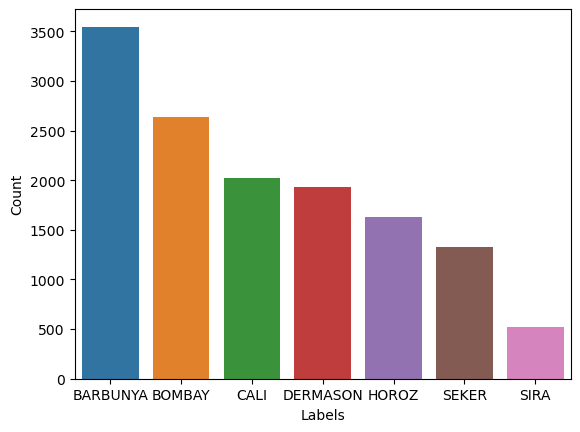

In [47]:
# plot the histogram of Class
count_label = df["Class"].value_counts()
sns.barplot(x=np.array(class_names),y=count_label.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

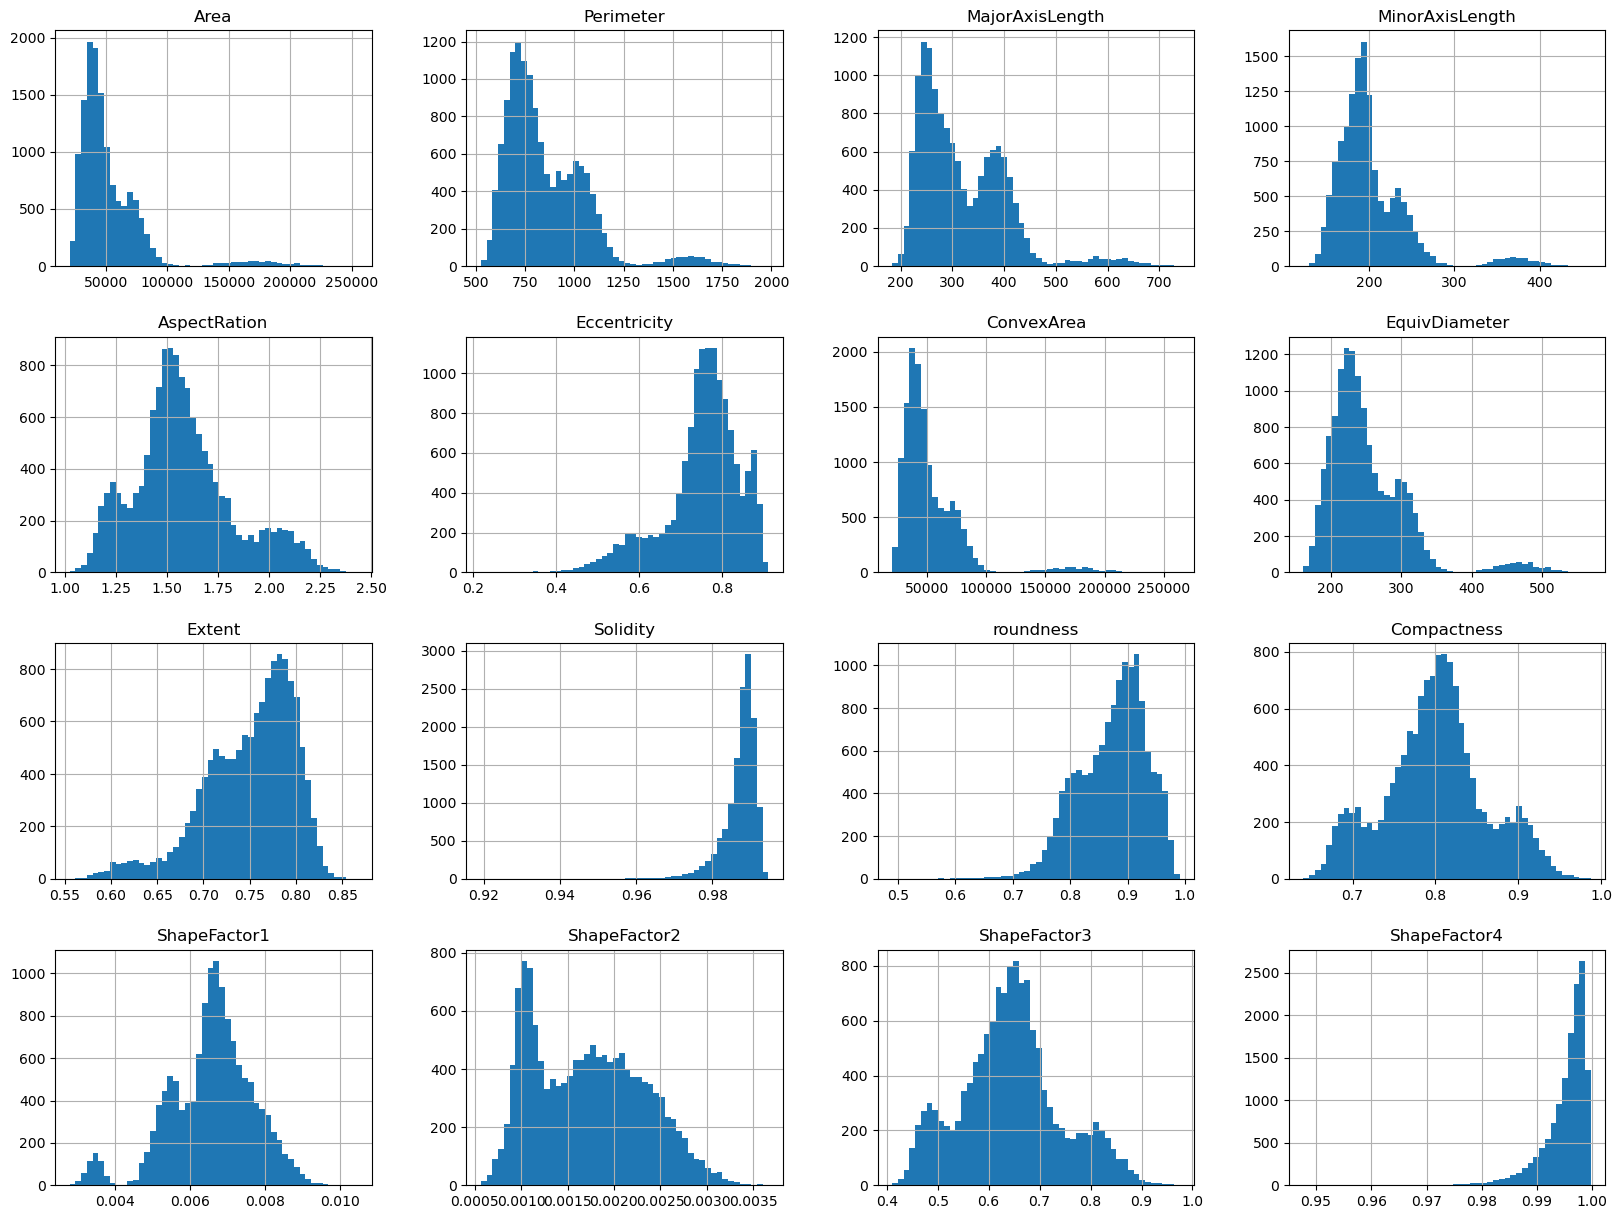

In [48]:
# show the histogram for each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

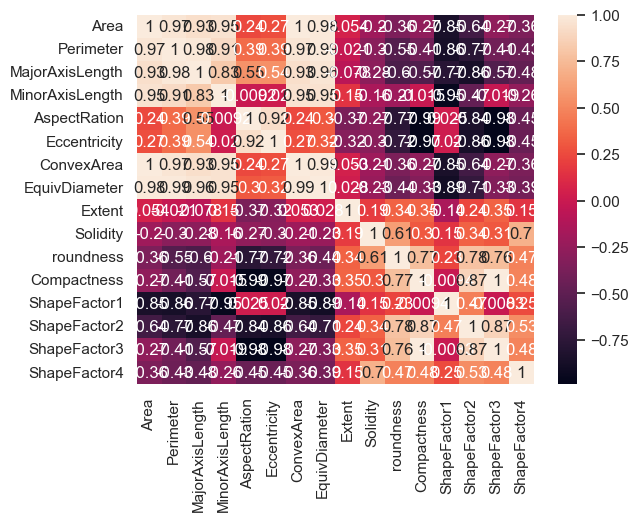

In [49]:
# show the relationship of a pair feature
corr_matrix = df.corr()
sns.set()
sns.heatmap(corr_matrix,annot=True)
plt.show()

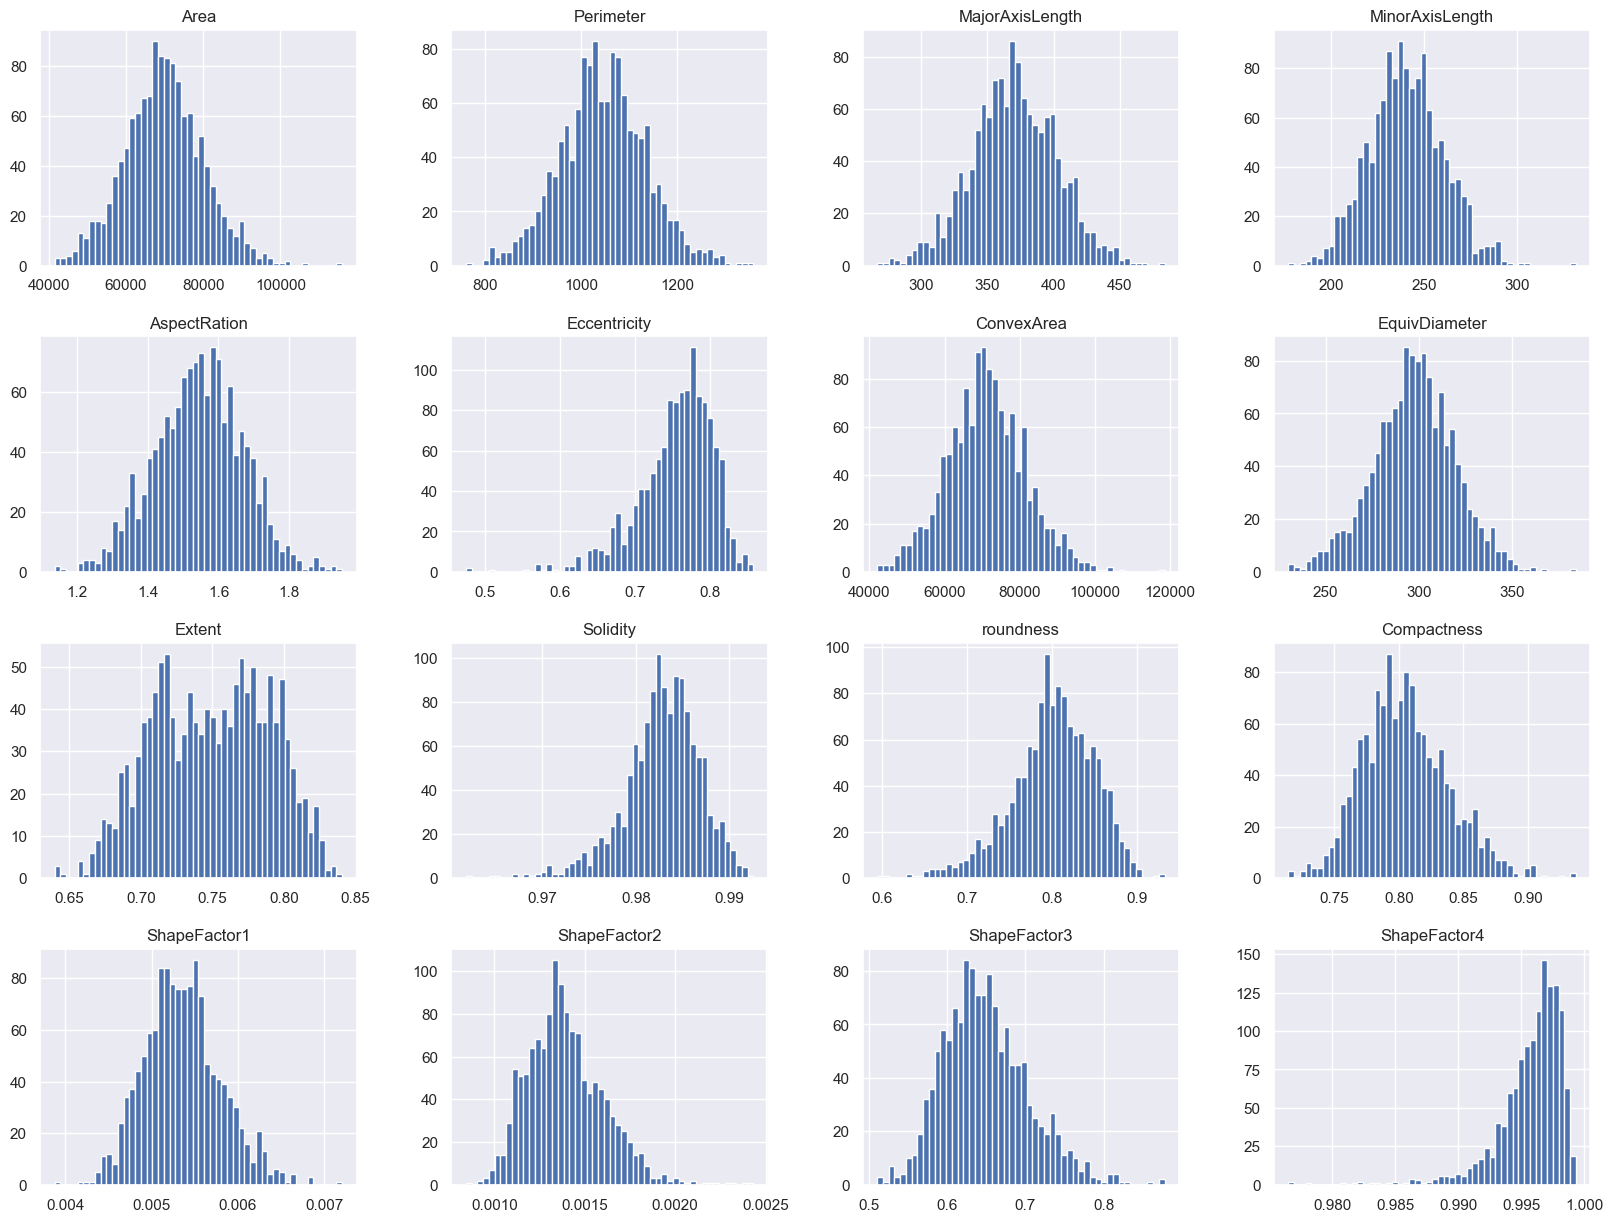

In [50]:
# show histogram of all features in one label, for example: 'BARBUNYA'
selected_class = df[df['Class'] == 'BARBUNYA']
selected_class.hist(bins=50, figsize=(20,15))
plt.show()

In [51]:
# change the string into number for the class column
labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [52]:
# to see what name correspond label
labels = dict(zip(df['Class'],labelencoder.inverse_transform(df['Class'])))
labels

{5: 'SEKER',
 0: 'BARBUNYA',
 1: 'BOMBAY',
 2: 'CALI',
 4: 'HOROZ',
 6: 'SIRA',
 3: 'DERMASON'}

In [53]:
# split dataset into 2 parts, training and test set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

print(df_train.shape, df_test.shape)

(10888, 17) (2723, 17)


https://medium.com/analytics-vidhya/principal-component-analysis-pca-dive-deep-411db0f9ee10

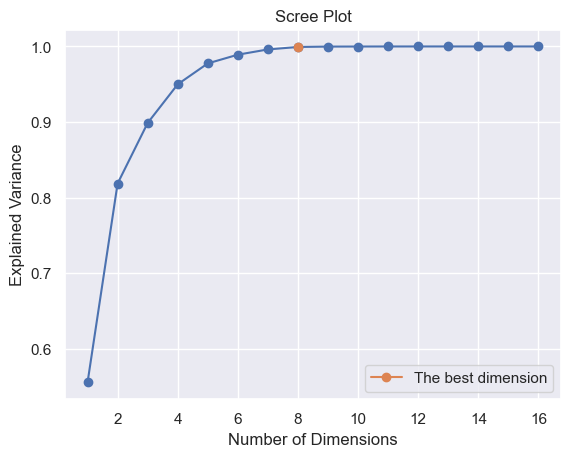

The best dimension is  8


In [54]:
# using PCA on the training set to find the best dimension
X = df_train.drop('Class', axis=1).values

# Normalize the data (important for PCA)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Plot the scree plot
# generate the cumulative variance ratio
explained_variances = np.cumsum(eigenvalues) / np.sum(eigenvalues)
best_dimesion = np.argmax(np.diff(explained_variances)<10**-3)+1

plt.plot(range(1, X.shape[1] + 1), explained_variances, marker='o')
plt.plot(best_dimesion, explained_variances[best_dimesion], marker='o',label = 'The best dimension')
plt.title('Scree Plot')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()
print("The best dimension is ", best_dimesion)

In [55]:
# design the function to change the dataset into the new dataset reducing dimension
def PCA(df, num_components):
    # Separate features (X) and the target variable (y)
    X = df.drop('Class', axis=1).values  # Assuming 'Class' is the target variable
    y = df['Class'].values

    # Standardize the features
    mean_vals = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean_vals) / std_dev

    # Compute the covariance matrix
    cov_matrix = np.cov(X_scaled, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    evas, eves = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    eva_indices = np.argsort(evas)[::-1]
    evas = evas[eva_indices]
    eves = eves[:, eva_indices]

    # Choose the number of principal components
    principal_components = eves[:, :num_components]

    # Project the data onto the principal components
    X_pca = np.dot(X_scaled, principal_components)

    # Create a new DataFrame with the principal components and the target variable
    columns = []
    for i in range(num_components):
        columns.append('Principal Component ' + str(i+1))
    df_pca = pd.DataFrame(data=X_pca, columns=columns)
    df_pca['Class'] = y
    return df_pca

In [56]:
df_pca = PCA(df_train, num_components = best_dimesion)

In [57]:
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Class
0,2.550345,1.378957,0.474656,0.943623,-0.240701,0.646934,-0.119775,-0.051635,3
1,0.986881,0.961819,0.932482,0.790964,0.474357,0.119939,-0.062713,-0.275533,3
2,3.314004,-0.290352,0.438173,0.541886,-0.220432,0.156306,0.248658,-0.218546,3
3,2.405627,0.022574,-0.232188,-0.635419,-0.179134,0.155514,-0.148602,-0.030776,3
4,2.573948,-0.619082,-0.084790,-0.512682,0.695043,0.135455,-0.033525,-0.059629,5
...,...,...,...,...,...,...,...,...,...
10883,-3.788101,-0.237737,-1.655472,-1.077451,-0.005255,-0.388993,0.144686,0.106894,2
10884,0.883593,1.104323,-0.332919,1.030463,-0.050471,0.075949,-0.270566,-0.101542,3
10885,-3.963826,-0.927460,-1.581708,-0.687326,-0.180666,-0.405375,0.091797,-0.023820,2
10886,3.446955,-2.139383,0.113883,0.631362,-0.133586,-0.186905,0.086031,0.206803,5


In [58]:
# ML_model function to training a specific model by setting model's name
def ML_model(xtrain,ytrain,xtest,model):
    if model == "Logistic Regression":
        clf = LogisticRegression(max_iter=1000, random_state=42)
        
    elif model == "SVM":
        clf = SVC(kernel='linear', C=1.0, random_state=42)
    elif model == "Random Forest":
        clf = RandomForestClassifier(max_depth=5, n_estimators= 10,random_state=42)
        
    elif model == "Gradient Boosting Classifer":
        clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
    elif model == "Naive Bayes":
        clf = GaussianNB()
    elif model == "Neural Network":
        clf = MLPClassifier(random_state=42)
        
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)  
    return y_pred

In [59]:
# create the list of model's name
model_name = ["Logistic Regression","SVM","Random Forest","Gradient Boosting Classifer",\
              "Naive Bayes", "Neural Network"]
# create the list of type dataset
type_training_set = ["Original dataset", "Reduced dimension dateset with PCA"]
# create the index's name in Dataframe
indexs = ["Accuracy (%)","Time (s)"]
# separate the datasets with training input and output
x_train_pca = df_pca.drop('Class', axis=1).values
y_train_pca = df_pca['Class'].values
x_train_or = df_train.drop('Class', axis=1).values
y_train_or = df_train['Class'].values
# change the dataset with PCA
df_test_pca = PCA(df_test, num_components = 8)
# separate the datasets with training input and output
x_test_pca = df_test_pca.drop('Class', axis=1).values
y_test_pca = df_test_pca['Class'].values
x_test_or = df_test.drop('Class', axis=1).values
y_test_or = df_test['Class'].values

In [60]:
# run the loops to survey the models and get the Accuracy and Running Time
for i in range(len(model_name)):
    values = np.zeros([2,2])
    for j in range(2):
        start = time.time()
        if j==0:
            y_pred = ML_model(x_train_or,y_train_or,x_test_or,model_name[i])
            values[0,j] = round(accuracy_score(y_test_or, y_pred)*100, 2)      
        else:
            y_pred = ML_model(x_train_pca,y_train_pca,x_test_pca,model_name[i])
            values[0,j] = round(accuracy_score(y_test_pca, y_pred)*100, 2)
        end = time.time()
        time_count = end-start
        values[1,j] = round(time_count,2)
    df_model = pd.DataFrame(values, \
                  index=indexs, columns=type_training_set)
    print("--------------------------------------------------------")
    print(f"Machine Learning algorithm: {model_name[i]} \n")
    display(df_model)
    print("\n")

--------------------------------------------------------
Machine Learning algorithm: Logistic Regression 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),89.28,92.51
Time (s),1.91,0.33




--------------------------------------------------------
Machine Learning algorithm: SVM 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),91.92,92.91
Time (s),43.61,0.52




--------------------------------------------------------
Machine Learning algorithm: Random Forest 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),88.03,90.08
Time (s),0.17,0.11




--------------------------------------------------------
Machine Learning algorithm: Gradient Boosting Classifer 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),92.51,92.14
Time (s),15.46,8.34




--------------------------------------------------------
Machine Learning algorithm: Naive Bayes 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),75.80,89.94
Time (s),0.01,0.00




--------------------------------------------------------
Machine Learning algorithm: Neural Network 



,Original dataset,Reduced dimension dateset with PCA
Accuracy (%),42.27,93.21
Time (s),0.62,3.83


----Logistic Regression Model-----
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       261
           1       0.99      1.00      1.00       117
           2       0.89      0.93      0.91       317
           3       0.88      0.89      0.89       671
           4       0.95      0.92      0.93       408
           5       0.94      0.93      0.93       413
           6       0.82      0.84      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.90      0.91      2723
weighted avg       0.89      0.89      0.89      2723



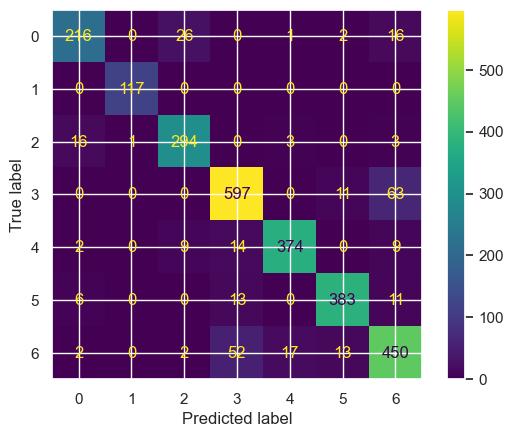

In [61]:
# show the confusion matrix in the Logistic Regression Model
y_pred = ML_model(x_train_or,y_train_or,x_test_or,model_name[0])

print(f"----{model_name[0]} Model-----")
print(classification_report(y_test_or, y_pred))

cm = confusion_matrix(y_test_or, y_pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

----Logistic Regression Model Using PCA-----
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.96      0.93      0.94       317
           3       0.91      0.92      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.89      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



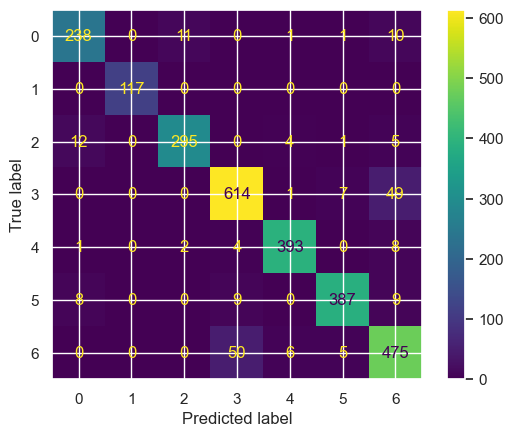

In [62]:
# show the confusion matrix in the Logistic Regression Model using PCA
y_pred = ML_model(x_train_pca,y_train_pca,x_test_pca,model_name[0])

print(f"----{model_name[0]} Model Using PCA-----")
print(classification_report(y_test_pca, y_pred))

cm = confusion_matrix(y_test_or, y_pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [63]:
# predict labels using the Logistic Regression Model using PCA
def predict_label(xtest,xtrain=x_train_pca,ytrain = y_train_pca):
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)
    return y_pred

In [64]:
# choosing random an example to check 
# replace the predicted label into the name of bean
index = random.randint(0, len(df))
dataset = pd.read_excel('Dry_Bean_Dataset.xlsx')
dataset = PCA(dataset, num_components = best_dimesion)
x_test = np.array(dataset.iloc[index].drop('Class')).reshape(1, -1)
y_test = dataset.iloc[index]['Class']
label = predict_label(x_test,xtrain=x_train_pca,ytrain = y_train_pca)
Class = labels[label[0]]
print(f"Predict: {Class}")
# check whether the predicted name is correct or not
if Class==y_test:
    print(True)
else:
    print(False)
    

Predict: CALI
True
